In [ ]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('/content/SDSS17.csv')
data.head(20)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

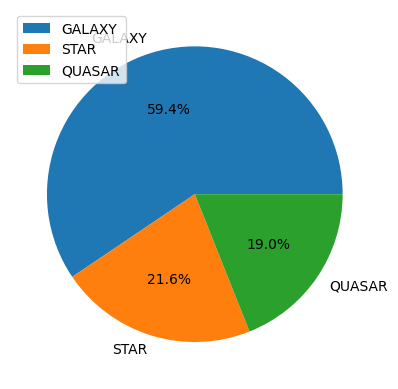

In [ ]:
plt.pie(data['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QUASAR'])
plt.legend()

In [ ]:
data['class']=data['class'].map({'GALAXY':0,'STAR':1,'QSO':2})

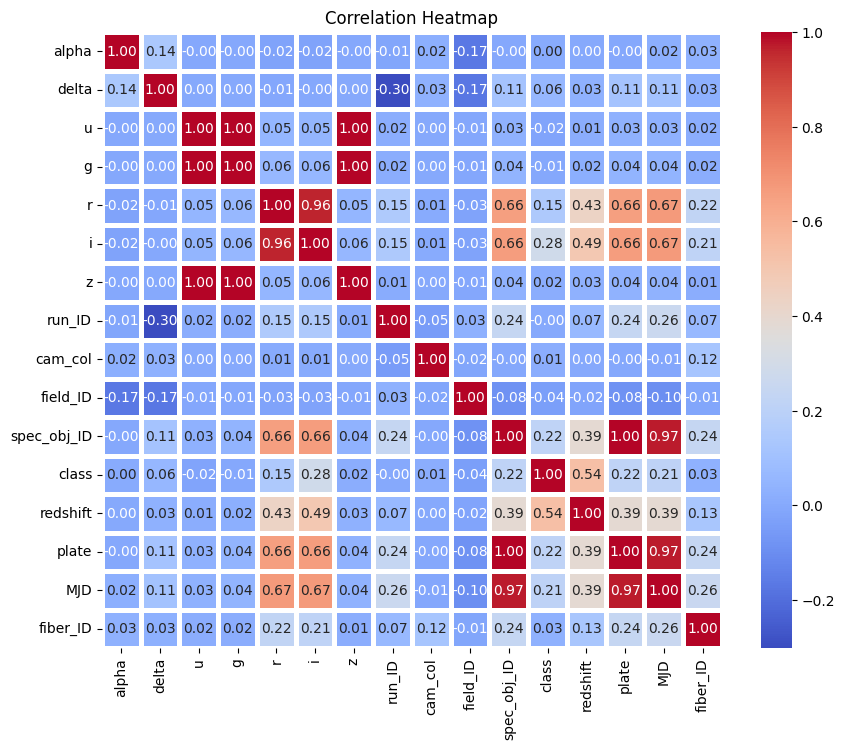

In [ ]:
data.drop(columns=['rerun_ID','obj_ID'],inplace=True,axis=1)
correlation_matrix = data.corr()
fig , ax = plt.subplots(figsize=(10, 8))
sea.heatmap(correlation_matrix, annot=True,  linewidths=2.5, fmt=".2f", cmap='coolwarm',ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

In [ ]:
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Define base learners
base_learners = [
    ('RFC', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('GBC', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ETC', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Define stacking classifier for Star classification
stacking_Stars = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train stacking classifier for Star Type classification
stacking_Stars.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('RFC', RandomForestClassifier(random_state=42)),
                               ('GBC',
                                GradientBoostingClassifier(random_state=42)),
                               ('ETC', ExtraTreesClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Predictions for star type classification
predictions_train = stacking_Stars.predict(X_train_scaled)
predictions_test = stacking_Stars.predict(X_test_scaled)

# Calculate accuracy for Star classification
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)


print("Star Classification Accuracy (Train):", accuracy_train*100)
print("Star Classification Accuracy (Test):", accuracy_test*100)



Star Classification Accuracy (Train): 99.98142857142858
Star Classification Accuracy (Test): 97.87333333333333


In [ ]:
# Calculate confusion matrix for star type classification
conf_matrix_star = confusion_matrix(y_test, predictions_test)

print("\nConfusion Matrix for Stellar Classification:")
print(conf_matrix_star)


Confusion Matrix for Stellar Classification:
[[17568    19   192]
 [    6  6528     0]
 [  418     3  5266]]


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predictions_test, average=None)
recall = recall_score(y_test,  predictions_test, average=None)

# Calculate average precision for each class
# Print the results for each class
for class_id in range(len(precision)):
    print(class_id)
    print(f"Precision: {precision[class_id]}")
    print(f"Recall: {recall[class_id]}")
    print("--------------")

0
Precision: 0.9764339706536238
Recall: 0.988132065920468
--------------
1
Precision: 0.9966412213740458
Recall: 0.9990817263544536
--------------
2
Precision: 0.9648222792231587
Recall: 0.9259715139792509
--------------


IndexError: invalid index to scalar variable.

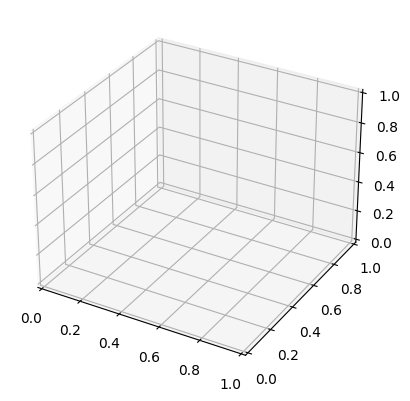

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Gal = data['class'][0]
Sta = data['class'][1]
Qua = data['class'][2]
colors = ['r', 'g', 'y']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point
for i in range(len(data)):
    ax.scatter(Gal[i], Sta[i], Qua[i], c=colors[i], marker='o')

# Customize plot (add labels, title, etc.)
ax.set_xlabel('Galaxies')
ax.set_ylabel('Stars')
ax.set_zlabel('Quasars')
ax.set_title('Stellar Classification Visualization')

plt.show()

<ipython-input-24-daef882f7efa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(data["class"], palette="Set3")


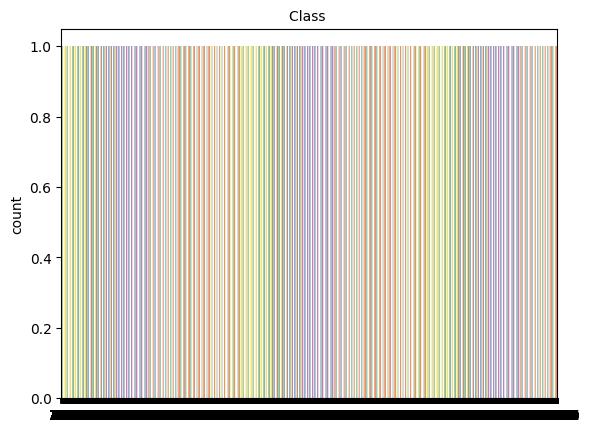

In [ ]:
sea.countplot(data["class"], palette="Set3")
plt.title("Class ",fontsize=10)
plt.show()